# Getting Your Data From Yelp!

In order to make sure you are on track to completing the project, you will complete this workbook first. Below are steps that you need to take in order to make sure you have your data from yelp and are ready to analyze it. Your cohort lead will review this workbook with you the Wednesday before your project is due.    

## Part 1 - Understanding your data and question

You will be pulling data from the Yelp API to complete your analysis. The api, however, provides you with a lot of information that will not be pertinent to your analysis. YOu will pull data from the api and parse through it to keep only the data that you will need. In order to help you identify that information,look at the API documentation and understand what data the api will provide you. 

Identify which data fields you will want to keep for your analysis. 

https://www.yelp.com/developers/documentation/v3/get_started

In [540]:
import json
import requests
import sys
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:

print(sys.path)

['/Users/leratsayukova/Documents/Flatiron/Bikes', '/Users/leratsayukova/opt/anaconda3/lib/python38.zip', '/Users/leratsayukova/opt/anaconda3/lib/python3.8', '/Users/leratsayukova/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages', '/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/Users/leratsayukova/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/leratsayukova/.ipython']


In [75]:
url= 'https://api.yelp.com/v3/businesses/search'

In [76]:
client_id = 'UPd8KVfQybexrmKSjNF-mA'
api_key = 'TQ3V7mYVhRo1vOV7HFkQEuG-QKC7eVgNjpOkfkGD43EnLnLLY2ub-owG779hx-vZI6YX6YQZSxmE9kOjoo8iQYMx3mq0pwqenQ3Jc_vYjMZCci2PPC-BevZVmZomYHYx'




___

## Part 2 - Create ETL pipeline for the business data from the API

Now that you know what data you need from the API, you want to write code that will execute a api call, parse those results and then insert the results into the DB.  

It is helpful to break this up into three different functions (*api call, parse results, and insert into DB*) and then you can write a function/script that pull the other three functions together. 

Let's first do this for the Business endpoint.

- Write a function to make a call to the yelp API

In [77]:
headers = {'Authorization':'Bearer {}'.format(api_key),}
 

In [164]:

term= 'restaurants'
location='Austin'
categories='pizza'

In [165]:
url_params = {
                "term": term.replace(' ', '+'),
                "location": location.replace(' ', '+'),
                "categories" : categories,
                "limit": 50,
    
            }

In [166]:
def yelp_call(url_params, api_key):
    
    response= requests.get(url, headers=headers, params=url_params)  
    
    if response.status_code==200:
        return response.json()
     
    else: 
        return response.status_code
    


In [167]:
response= yelp_call(url_params, api_key)

## can we make a loop for the function to call itself ?

In [168]:
business_data= response['businesses']

In [169]:
response['total']

191

In [170]:
business_data[0]

{'id': '-kr42hgTb3_SlQqW5xxywQ',
 'alias': 'bull-and-bowl-austin',
 'name': 'Bull And Bowl',
 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/FskyVggLS_vSgwKoG5ldlQ/o.jpg',
 'is_closed': False,
 'url': 'https://www.yelp.com/biz/bull-and-bowl-austin?adjust_creative=UPd8KVfQybexrmKSjNF-mA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=UPd8KVfQybexrmKSjNF-mA',
 'review_count': 1,
 'categories': [{'alias': 'bars', 'title': 'Bars'},
  {'alias': 'tradamerican', 'title': 'American (Traditional)'},
  {'alias': 'pizza', 'title': 'Pizza'}],
 'rating': 5.0,
 'coordinates': {'latitude': 30.26916, 'longitude': -97.74771},
 'transactions': [],
 'location': {'address1': '501 W 6th St',
  'address2': 'Ste 200',
  'address3': '',
  'city': 'Austin',
  'zip_code': '78701',
  'country': 'US',
  'state': 'TX',
  'display_address': ['501 W 6th St', 'Ste 200', 'Austin, TX 78701']},
 'phone': '+15129920707',
 'display_phone': '(512) 992-0707',
 'distance': 4112.802338025256}

In [ ]:
# business_data[0].keys()

**What data do we want from each business?**

In [ ]:
# business_data[0]['name']
# business_data[0]['rating']
# business_data[0]['review_count']
# business_data[0]['location']['zip_code']


    

- Write a function to parse the API response so that you can easily insert the data in to the DB

In [229]:
def parse_results(results):
    parsed_results =[]
    for biz in results:
        biz_info= ( biz['id'],
                   biz['name'],
                   biz['rating'],
                   biz['review_count'],
                   biz['location']['zip_code'])
        parsed_results.append(biz_info)
    
    return parsed_results



In [ ]:
# parse_results(business_data)

In [230]:
parsed_results= parse_results(business_data)
parsed_results

[('-kr42hgTb3_SlQqW5xxywQ', 'Bull And Bowl', 5.0, 1, '78701'),
 ('vo1MjyIvHbAJ93PasKHIRg', 'The Grove Wine Bar & Kitchen', 4.0, 288, '78701'),
 ('ac1jxd_s57WrIv0NS_TmTA', 'Shortie’s Pizza & Grinders', 4.5, 16, '78757'),
 ('v87I5i4XxiCr9Ihiqkbc4A', 'The Grove Wine Bar & Kitchen', 4.0, 499, '78746'),
 ('LXQiHzcMUxm4hp36v_Ah_w', 'The Jackalope', 3.5, 967, '78701'),
 ('8sEbM_ACHUbBsZ-TRZFXWA', 'Home Slice Pizza', 4.5, 448, '78751'),
 ('raXi6598v97VVJGxuet_ZQ', 'Cucina on 35th', 4.0, 217, '78703'),
 ('lnxDPi7QcCqp733mTOJcZA', 'Bufalina Due', 4.0, 124, '78757'),
 ('cM-qEu8khiRs_qzfGQsUPQ', 'Bufalina', 4.0, 564, '78702'),
 ('_Y5GEb-PJvogHYUYuVJtmw', "Pedroso's Pizza", 5.0, 1, '78757'),
 ('K6Xm4kI1I2HPssM9FgXNsA', 'Via 313 Pizza - West 6th', 4.5, 718, '78701'),
 ('Dc96Pu8n9FRIIMPW3HPGcw',
  'i Fratelli Pizza Downtown Austin',
  4.5,
  45,
  '78701'),
 ('GZfHsTQAabxdXB_z30h6kw', 'DeSano Pizzeria Napoletana', 4.5, 133, '78701'),
 ('skvuuJVurCYV6J9QcAC0SA', 'Il Brutto', 4.0, 274, '78702'),
 ('Yus

- Write a function to take your parsed data and add it to the csv file where you will store all of your results. 

In [ ]:
# pr_df= pd.DataFrame(parsed_results, columns= 
#              ['name', 'rating', 'review_count', 'zipcode'])

In [ ]:
# pr_csv=pr_df.to_csv(path_or_buf='/Users/leratsayukova/Documents/Flatiron/Bikes/data/csv_data')

In [231]:
def df_save(csv_filepath, parsed_results):
    
    
    pr_df= pd.DataFrame(parsed_results, columns= 
             ['business_id','biz_name', 'biz_rating', 'biz_review_count', 'biz_zipcode'])
    
    pr_csv=pr_df.to_csv(path_or_buf=csv_filepath, mode="a", header="False")
   
    return print("Results added!")
   

In [ ]:
# df_save('/Users/leratsayukova/Documents/Flatiron/Bikes/data/csv_data', parsed_results)

- Write a script that combines the three functions above into a single process.

While it will take some experimentation to write the functions above, once you get them working it will be best to put them in a `.py` file and then import the functions to use in a script 

In [25]:
from helpers import *

ModuleNotFoundError: No module named 'helpers'

**^^Not working 

In [232]:
def yelp_data(url_params, api_key):
    yelp_call(url_params, api_key)
    parse_results(business_data)
    df_save('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_data_pizza', parsed_results)
    our_data= pd.read_csv('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_data_pizza')
    return our_data

In [ ]:
# yelp_data(url_params,api_key)

In [233]:


# create a variable  to keep track of which result you are in. 
cur = 0
num= response['total']

#set up a while loop to go through and grab the result 
while cur <= num and cur < 1000:
    #set the offset parameter to be where you currently are in the results 
    url_params['offset'] = cur
    #make your API call with the new offset number
    results =  yelp_call(url_params, api_key)
    
    #after you get your results you can now use your function to parse those results
    new_parsed_results = parse_results(results['businesses'])
    
    # use your function to insert your parsed results into the db
    df_save('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_data_pizza', new_parsed_results)
    
    
    #increment the counter by 50 to move on to the next results
    cur += 50

Results added!
Results added!
Results added!
Results added!


In [176]:
results

{'businesses': [{'id': 'uuhrPZlKNcUnaZtg9Eav4A',
   'alias': 'pizzeria-paparazzi-austin',
   'name': 'Pizzeria Paparazzi',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/VPDCq6ISgp6iI6Ig5uszDw/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/pizzeria-paparazzi-austin?adjust_creative=UPd8KVfQybexrmKSjNF-mA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=UPd8KVfQybexrmKSjNF-mA',
   'review_count': 35,
   'categories': [{'alias': 'pizza', 'title': 'Pizza'}],
   'rating': 1.5,
   'coordinates': {'latitude': 30.26739, 'longitude': -97.7403999},
   'transactions': [],
   'price': '$',
   'location': {'address1': '6TH And San Jacinto',
    'address2': '',
    'address3': '',
    'city': 'Austin',
    'zip_code': '78798',
    'country': 'US',
    'state': 'TX',
    'display_address': ['6TH And San Jacinto', 'Austin, TX 78798']},
   'phone': '',
   'display_phone': '',
   'distance': 4516.77970467314},
  {'id': 'L4I11YwBOhk1EQHdIRoIHw',
   'alia

In [177]:
bikes_csv= pd.read_csv('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_data_pizza', header=0, 
                       names=['business_id','biz_name', 'biz_rating', 'biz_review_count', 'biz_zipcode']).reset_index(drop=True)
# pd.set_option('display.max_rows', None, 'display.max_columns', None)
bikes_csv

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode
0,-kr42hgTb3_SlQqW5xxywQ,Bull And Bowl,5.0,1,78701
1,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701
2,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757
3,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746
4,LXQiHzcMUxm4hp36v_Ah_w,The Jackalope,3.5,967,78701
5,8sEbM_ACHUbBsZ-TRZFXWA,Home Slice Pizza,4.5,448,78751
6,raXi6598v97VVJGxuet_ZQ,Cucina on 35th,4.0,217,78703
7,lnxDPi7QcCqp733mTOJcZA,Bufalina Due,4.0,124,78757
8,cM-qEu8khiRs_qzfGQsUPQ,Bufalina,4.0,564,78702
9,_Y5GEb-PJvogHYUYuVJtmw,Pedroso's Pizza,5.0,1,78757


In [178]:
Bikes_csv= bikes_csv.drop([50,101,152])
Bikes_csv


,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode
0,-kr42hgTb3_SlQqW5xxywQ,Bull And Bowl,5.0,1,78701
1,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701
2,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757
3,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746
4,LXQiHzcMUxm4hp36v_Ah_w,The Jackalope,3.5,967,78701
5,8sEbM_ACHUbBsZ-TRZFXWA,Home Slice Pizza,4.5,448,78751
6,raXi6598v97VVJGxuet_ZQ,Cucina on 35th,4.0,217,78703
7,lnxDPi7QcCqp733mTOJcZA,Bufalina Due,4.0,124,78757
8,cM-qEu8khiRs_qzfGQsUPQ,Bufalina,4.0,564,78702
9,_Y5GEb-PJvogHYUYuVJtmw,Pedroso's Pizza,5.0,1,78757


In [179]:
biz_ids=Bikes_csv.loc[:,'business_id'].to_list()
biz_ids_lst=list(set(biz_ids))


In [180]:
biz_ids_lst

['wnxepgfZtJW2O7YqbIvKiw',
 'OfgCuP2QN165d-EsrCCIYg',
 '1Eq16r_MSnvPsnIykBdy9w',
 'lRTGjg1rygCdTtM6pHDKaQ',
 'x13RBm34QIkIt8WyVnX2oA',
 '8yWbiBG_nGm9XGklAtssUw',
 'KdnceJFz2LluXhsMpGwklQ',
 'oSgSc5DkIbROamnRvdFQdA',
 'G450g-rWOTe8X-sLLlGhhQ',
 'fBvQQUk1-V9IUA8PbuYFWg',
 'Bh67FSOz3ZjUxORPmkOFKQ',
 'ivbHnKU2CsYI891tkTRGaQ',
 '0mWeENbi_K6quJScN79VAQ',
 '5Pp4jCBSRe5bxQHhrcrcRQ',
 'horYo4q7UDs71-Cv80VEMg',
 '3k-PzE0bxllr9glPURSYtw',
 '0dIF4OMuWzq1ltvBVb-WeQ',
 '-B7FSfGvyIgbuANlVWMtIw',
 'rFSbSKU4nxVkX4wV_pbsCA',
 'a_9mKPr6t2brOXUKm2Q7Nw',
 'cM-qEu8khiRs_qzfGQsUPQ',
 'PfBK5SuGJ2STvTPIeDVXrQ',
 'Vz0k0EGElVGiesGOatEIoQ',
 'xdWHz4mqq1Htarg3dLOKBw',
 'gXip--EE80jF-sqdk5Aghw',
 'gKREdIgb5vB844iOtbzqBA',
 'NOi0w33fTGghQvF32lrA8w',
 'K6734lBTMBeZFcXozPBsOg',
 'mG_qM3bTNdAVkjaWUrkkZw',
 'QPii9neIvUFgXunqZ_WKpw',
 '-kr42hgTb3_SlQqW5xxywQ',
 '_33gXTh_rPfk_jDYZphP2g',
 '5UrIw2HJe8Lbf2A_20inLg',
 'ac1jxd_s57WrIv0NS_TmTA',
 'g-6qv5f2Y4mVrsDD3JRkuQ',
 'EF0IqhJph_HNloXXqlVvLA',
 'P8x-eXc5_lBwqf2rClKtuA',
 

In [181]:
biz_id_1=biz_ids[0]
biz_id_1

'-kr42hgTb3_SlQqW5xxywQ'

___

## Part 3 -  Create ETL pipeline for the restaurant review data from the API

You've done this for the Businesses, now you need to do this for reviews. You will follow the same process, but your functions will be specific to reviews. Above you have a model of the functions you will need to write, and how to pull them together in one script. For this part, you have the process below 

- In order to pull the reviews, you will need the business ids. So your first step will be to get all of the business ids from your businesses csv. 

- Write a function that takes a business id and makes a call to the API for reivews


- Write a function to parse out the relevant information from the reviews

- Write a function to save the parse data into a csv file containing all of the reviews. 

- Combine the functions above into a single script  

In [ ]:
# url_params_reviews = {
#                 "term": term.replace(' ', '+'),
#                 "location": location.replace(' ', '+'),
#                 "categories" : categories,
#                 "limit": 50,
    
#             }

In [ ]:
#Only need to run if there is a nan value in Business Ids List
# biz_ids_lst.pop(13)

In [97]:
biz_ids_lst

['UIiT7YnhR98hYfJCr9WFOw',
 'Xe2dyC5eNT62LJ4wBmzdBw',
 'oTujfSf88bPOcUWEmDBzjQ',
 'HBk5PJqwvOws_5TB5YiKeA',
 'bmZKlzOEi7DYDDFnNA5iVg',
 '0x1olLBpqVTOKLsRPHUdHw',
 'bEucpvvBMA5wXHDJ7kGQuQ',
 'yuNrhGEVy_5sxu_MOooI1Q',
 'DIb8Cww5j34ng0pPR-Ii_A',
 'gWhCMZVm0ITZC7KxI3M2Pw',
 'rEjqV_x9lVf1MLWyF8mbVg',
 'go_CpQY6UGh5_gSPN2E93Q',
 '7s-l-xIWiYy6AxwzxWvn-Q',
 'p_wt4guOqISWeQtUbcF_lg',
 'CvOv3pBzvVL0dmp6bHicJQ',
 'X0BYMTPhftsADJ0-OiHx4A',
 '6raS3PawAC3EsHa1i0uQ4Q',
 '-4SfHHiTVTLeOEt8TF0nTQ',
 'vP8Zpcx1gc-R5zCgCjO7Wg',
 'aTACUTGzgmjbUy-fkEK5Iw',
 'NDkHtQibtr7T6mMzfENszg',
 'k5CNUWxj45sCqcKXn2H2_Q',
 '_o0_tRse_5QeW7I_p9eL-A',
 'EkmSF_3tSa46oMRT9hrlOw',
 'VXqkUQfJLOu6vTVCsUy9Yg',
 'ILH9kf0X7IkiwlZqWQTUGg',
 'Y5RaFaBi8rsL2NAkne17gQ',
 '8dY8Ehrvmd1S1vK3littAg',
 'qmJyuH9xfyYYz6q3nb49Pg',
 '18UGjpTexL3nRJ4UrMSM7w',
 'HliPtTKSvqoM8TmbT3aB7w',
 'OJAxJqhHuFc-ckg6jB2BAg',
 '9e3kryPr-Eyok1hrVWsTSA',
 '4EdSNL5cShH-ZNsUbwWSJQ',
 '1yvLoRRt15RraRMlrdUBTg',
 'P4PTWztg4yRAxUDIVSI5ow',
 '5Z7RlLomCg1bAS0SBOzi0A',
 

In [182]:
def yelp_call_reviews(url_review, api_key):
    response= requests.get(url_reviews, headers=headers)  
    if response.status_code==200:
        return response.json()
    else: 
        return response.status_code


In [183]:
for bid in biz_ids_lst:
    url_reviews='https://api.yelp.com/v3/businesses/' + bid + '/reviews'
    url_data = yelp_call_reviews(url_reviews, api_key)

In [184]:
url_data = yelp_call_reviews(url_reviews, api_key)

In [ ]:
reviews

In [185]:
url_data['reviews']

[{'id': '2rpJx7ebMsVgoOTKnLSROQ',
  'url': 'https://www.yelp.com/biz/cane-rosso-sunset-valley?adjust_creative=UPd8KVfQybexrmKSjNF-mA&hrid=2rpJx7ebMsVgoOTKnLSROQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=UPd8KVfQybexrmKSjNF-mA',
  'text': 'Come for the pizza, stay for the Brussels sprouts. \n\nOf course, I want to stay for a whole variety of reasons, including the spacious, covered,...',
  'rating': 5,
  'time_created': '2020-12-20 05:26:12',
  'user': {'id': 'Zu9ImENVi3ldALdT02AOwg',
   'profile_url': 'https://www.yelp.com/user_details?userid=Zu9ImENVi3ldALdT02AOwg',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/1g-NAILODK6AOAeD2wFlyA/o.jpg',
   'name': 'Hannah K.'}},
 {'id': 'LkxrpxdKuN-iIUtOEKmgoA',
  'url': 'https://www.yelp.com/biz/cane-rosso-sunset-valley?adjust_creative=UPd8KVfQybexrmKSjNF-mA&hrid=LkxrpxdKuN-iIUtOEKmgoA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=UPd8KVfQybexrmKSjNF-mA',
  'text': 'Ordered some to-

In [217]:
review_data= yelp_call_reviews(url_data, api_key)
reviews= review_data['reviews']
reviews

[{'id': '2rpJx7ebMsVgoOTKnLSROQ',
  'url': 'https://www.yelp.com/biz/cane-rosso-sunset-valley?adjust_creative=UPd8KVfQybexrmKSjNF-mA&hrid=2rpJx7ebMsVgoOTKnLSROQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=UPd8KVfQybexrmKSjNF-mA',
  'text': 'Come for the pizza, stay for the Brussels sprouts. \n\nOf course, I want to stay for a whole variety of reasons, including the spacious, covered,...',
  'rating': 5,
  'time_created': '2020-12-20 05:26:12',
  'user': {'id': 'Zu9ImENVi3ldALdT02AOwg',
   'profile_url': 'https://www.yelp.com/user_details?userid=Zu9ImENVi3ldALdT02AOwg',
   'image_url': 'https://s3-media1.fl.yelpcdn.com/photo/1g-NAILODK6AOAeD2wFlyA/o.jpg',
   'name': 'Hannah K.'}},
 {'id': 'LkxrpxdKuN-iIUtOEKmgoA',
  'url': 'https://www.yelp.com/biz/cane-rosso-sunset-valley?adjust_creative=UPd8KVfQybexrmKSjNF-mA&hrid=LkxrpxdKuN-iIUtOEKmgoA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_reviews&utm_source=UPd8KVfQybexrmKSjNF-mA',
  'text': 'Ordered some to-

In [ ]:
for review in reviews:
    print(review)

In [ ]:
biz_ids_lst

In [204]:
review_data.keys()

dict_keys(['reviews', 'total', 'possible_languages'])

In [187]:
def yelp_reviews(url_params_reviews, api_key):
    yelp_call_reviews(biz_ids_lst, api_key)
    parse_reviews(reviews)
    df_save_reviews('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_reviews_pizza', parsed_reviews)
    our_data= pd.read_csv('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_reviews_pizza')
    return our_data

In [221]:
def parse_reviews(bid, reviews):
    parsed_reviews =[]
    for review in reviews:
        review_info= ( bid,
                    review['id'],
                    review['text'],
                    review['rating'] 
                           )
        parsed_reviews.append(review_info)
        
    return parsed_reviews


In [222]:
def df_save_reviews(csv_filepath, parsed_reviews):
    
    
    pr_df= pd.DataFrame(parsed_reviews, columns= 
             ['business_id','id','text', 'rating'])
    
    pr_csv=pr_df.to_csv(path_or_buf=csv_filepath, mode="a", header=False)
   
    return print("Results added!")
            

In [220]:
url_reviews

'https://api.yelp.com/v3/businesses/R5lZv6sfLOHJESP2CccNqw/reviews'

In [213]:
for bid in biz_ids_lst:
# #     print(bid)
    url_reviews='https://api.yelp.com/v3/businesses/' + bid + '/reviews'
    url_data = yelp_call_reviews(url_reviews, api_key)
    new_reviews = yelp_call_reviews(bid, api_key)
    #after you get your results you can now use your function to parse those results
    new_parsed_reviews = parse_reviews(bid, new_reviews['reviews'])
     # use your function to insert your parsed results into the db
    df_save_reviews('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_reviews_pizza', new_parsed_reviews)
   

Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results added!
Results ad

In [700]:
parsed_reviews= parse_reviews(bid, reviews)

In [701]:
Reviews_csv=pd.read_csv('/Users/leratsayukova/Documents/Flatiron/Bikes_Repo/data/csv_reviews_pizza', 
            names=['business_id','review_id', 'text', 'rating']).reset_index(drop=True)

In [702]:
Reviews_csv

,business_id,review_id,text,rating
0,Mnn1GADjW-aBThveMOXf2A,4eRljXnTk09LKnW0Jt26kA,"Ahhhh Gattis! It's my favorite, always yummy Austin staple! I'm no vegetarian, BUT...the Vegetarian Sampler is the best!!!!\n\nPee Wee at the Anderson...",5
1,Mnn1GADjW-aBThveMOXf2A,XBax5wzQlbaKf7k4ieC1sw,NO CURBSIDE PICK UP!!!\n\nAustin is at Stage 5 Covid-19 (the highest risk for contracting Covid-19). This Mr.Gatti's location has 2 parking spaces immediately...,1
2,Mnn1GADjW-aBThveMOXf2A,iawOfPPrX21RCUlaVNjUFA,"This place is really disgusting... \nand i order a pizza today and when I open the pizza, i found a silver fish in the box!!! Really I'm disgusted!!! I...",1
3,vo1MjyIvHbAJ93PasKHIRg,Y8IQlDycy4txkNxUdn21fA,If I could come here everyday and eat great food and drink good wine I would. A definite must to try in Austin!,5
4,vo1MjyIvHbAJ93PasKHIRg,FIWbYDMp0MncA9yHOKYDzQ,"Great patio vibes (well heated, nice views)! We also looove their bruschetta :) the salmon entree and capellini pasta were just ok to me, not as great as...",4
5,vo1MjyIvHbAJ93PasKHIRg,P1j_StdFQu04ZYoGZLG0kA,"This is a great place to go if you are looking for some great appetizers and wine! We sat out on the patio on a cold night, but we were very warm and...",4
6,hko1Bc-B0HhXmRBy__K99w,tKuwmxN7YF9Pgx-6IYUBvQ,"Pizza is great, salads are great, easy pickup window is great and patio is adorable. This place is everything you want in a fast, affordable but super high...",5
7,hko1Bc-B0HhXmRBy__K99w,DGb8tmOORuaXSLg1vEsBBw,"This is a hidden gem right down the street from me. When I say hidden, the pickup window is tucked into the 704 Apartment complex, follow the mister...",5
8,hko1Bc-B0HhXmRBy__K99w,rXi-dNmurcK4iUSMxmt6MA,Saw that a new pizza place opened down the street right when the whole pandemic started so we decided to give them a try and we're so happy we did. Coming...,5
9,6wZgz7iNNmDdRrYSGYK7PA,IDw_CUXnXYw3IgQJztTneQ,"As of Jan 2016 I haven't made a half-hearted ""New Years resolution"", but more of a firm commitment to improving my health. The most integral part of...",5


## Part 4 -  Using python and pandas, write code to answer the questions below. 


- Which are the 5 most reviewed businesses in your dataset?
- What is the highest rating recieved in your data set and how many businesses have that rating?
- What percentage of businesses have a rating greater than or  4.5?
- What percentage of businesses have a rating less than 3?
- What percentage of your businesseshave a price label of one dollar sign? Two dollar signs? Three dollar signs? No dollar signs?
- Return the text of the reviews for the most reviewed business. 
- Find the highest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the most reviews. 
- Find the lowest rated business and return text of the most recent review.  If multiple business have the same rating, select the business with the least reviews. 


In [195]:
rev_csv= Reviews_csv.head(9)
bik_csv= Bikes_csv.head(9)

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode
0,wfKxBxJ8RFZj8jOB6Lpn-Q,Trek Bicycle Lamar,4.5,280,78704
1,WT_d47o-V5xlMNx8trI0-A,Monkey Wrench Bicycles,5.0,94,78751
2,oTujfSf88bPOcUWEmDBzjQ,The Peddler Bike Shop,4.5,176,78751
3,Ved9jiedoOFf39iFHSyQbQ,ATX Bikes,4.5,72,78749
4,KVPUN4yU-2juc8Pc4sxKVQ,Clown Dog Bikes,5.0,134,78705
5,-Cza7JtBZZ7nuXZeStwPAA,Bike Farm,4.5,104,78756
6,4EdSNL5cShH-ZNsUbwWSJQ,Trek Bicycle Research,4.5,93,78759
7,ZtuzXaoMnY1gd0kMZFdpcw,Mellow Johnny's Bike Shop,4.0,205,78701
8,lXodVpk5ZUOVymDBlb10Zg,Trek Bicycle Guadalupe,4.5,10,78705


In [196]:
Bikes_csv

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode
0,-kr42hgTb3_SlQqW5xxywQ,Bull And Bowl,5.0,1,78701
1,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701
2,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757
3,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746
4,LXQiHzcMUxm4hp36v_Ah_w,The Jackalope,3.5,967,78701
5,8sEbM_ACHUbBsZ-TRZFXWA,Home Slice Pizza,4.5,448,78751
6,raXi6598v97VVJGxuet_ZQ,Cucina on 35th,4.0,217,78703
7,lnxDPi7QcCqp733mTOJcZA,Bufalina Due,4.0,124,78757
8,cM-qEu8khiRs_qzfGQsUPQ,Bufalina,4.0,564,78702
9,_Y5GEb-PJvogHYUYuVJtmw,Pedroso's Pizza,5.0,1,78757


In [197]:
merged_inner = pd.merge(left=Bikes_csv, right=_csv, left_on='business_id', right_on='business_id')
merged_inner 

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode,review_id,text,rating
0,-kr42hgTb3_SlQqW5xxywQ,Bull And Bowl,5.0,1,78701,4Mmif4lVNNBBrO-QV_1BpQ,This is the fun bar that W6th has been missing...,5
1,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,Y8IQlDycy4txkNxUdn21fA,If I could come here everyday and eat great fo...,5
2,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,FIWbYDMp0MncA9yHOKYDzQ,"Great patio vibes (well heated, nice views)! W...",4
3,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,P1j_StdFQu04ZYoGZLG0kA,This is a great place to go if you are looking...,4
4,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,_D2DYKjdiaRC-2YWyJT96Q,The pizza was great. Staff was very friendly a...,5
5,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,87m-ZjH0cz1nDYaLdr6h3w,"Ordered takeout at 6pm on a Saturday night, qu...",5
6,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,u14CWWL17ZNNp8LDUy3W_A,Tried the Shortie's pizza and roasted fennel s...,5
7,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,paqBZHHAviJIgkcu2CxGxA,The food selection is amazing. The choices of ...,5
8,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,n2EnKMHVcZXikdq_0rAi3g,Good pizza spot! FINALLY tried this place afte...,4
9,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,eeyoBJZ30bZvCwqumEMIGA,I ate at the Grove before the pandemic as well...,5


In [277]:
mi=merged_inner.copy()

________________________

In [ ]:
# bad_lst=['moto', 'power', 'auto']

# def contains(text):
    for elem in bad_lst:
        if elem in text:
            return True
        else:
            return False
        
# df['Motorcyles']= df['biz_bame'].map(contains)


## PANDAS QUESTIONS

**5 Most Reviewed Businesses**

In [295]:
# Renamed Merged DataFrame to 'mi' and checking for dtypes of columns
mi.dtypes

business_id          object
biz_name             object
biz_rating           object
biz_review_count     object
biz_zipcode          object
review_id            object
text                 object
rating                int64
most_reviewed       float64
dtype: object

In [298]:
# Converts all the appropriate columns in our dataFrame to numeric types
# so that we can work with values
mi[['biz_rating', 'biz_review_count', 'biz_zipcode', 'rating']]=mi[[
    'biz_rating', 'biz_review_count', 'biz_zipcode', 'rating']].apply(pd.to_numeric)


In [296]:
mi.head()

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode,review_id,text,rating,most_reviewed
0,-kr42hgTb3_SlQqW5xxywQ,Bull And Bowl,5.0,1,78701,4Mmif4lVNNBBrO-QV_1BpQ,This is the fun bar that W6th has been missing...,5,NaN
1,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,Y8IQlDycy4txkNxUdn21fA,If I could come here everyday and eat great fo...,5,NaN
2,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,FIWbYDMp0MncA9yHOKYDzQ,"Great patio vibes (well heated, nice views)! W...",4,NaN
3,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,P1j_StdFQu04ZYoGZLG0kA,This is a great place to go if you are looking...,4,NaN
4,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,_D2DYKjdiaRC-2YWyJT96Q,The pizza was great. Staff was very friendly a...,5,NaN


In [299]:
mi.dtypes

business_id          object
biz_name             object
biz_rating          float64
biz_review_count      int64
biz_zipcode           int64
review_id            object
text                 object
rating                int64
most_reviewed       float64
dtype: object

In [325]:
# Returns the 5 most reviewed restaurants and sets it equal to new variable
fivemr= mi.nlargest(15,['biz_review_count'])
fivemr.head(15)

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode,review_id,text,rating,most_reviewed
71,1Eq16r_MSnvPsnIykBdy9w,Home Slice Pizza,4.5,3784,78704,-LgPipxE9fccekAAdbG2rg,"Ok so I lived in NYC for years pre-pandemic, a...",5,NaN
72,1Eq16r_MSnvPsnIykBdy9w,Home Slice Pizza,4.5,3784,78704,NqNe89aIfQV8hFZEG8KlrA,[covid review]\nExceptional service! I got a c...,5,NaN
73,1Eq16r_MSnvPsnIykBdy9w,Home Slice Pizza,4.5,3784,78704,lg-H_1OcASgtk2VXbH4XRw,My boyfriend is a true New Yorker. Since we ha...,5,NaN
119,VJDXjHHahRU3P_Ultl7-Yw,North Italia,4.0,1293,78758,CAzcxEffGRQQmUvsuM9yZQ,"Dear World,\n\nI just left this restaurant aft...",5,NaN
120,VJDXjHHahRU3P_Ultl7-Yw,North Italia,4.0,1293,78758,aDzO2EmaBrdnaXHGBuALeg,This is one of my favorite Italian restaurants...,5,NaN
121,VJDXjHHahRU3P_Ultl7-Yw,North Italia,4.0,1293,78758,opvIgYtHtQ6FS4s0LRD-rg,The only sad thing about this review is that i...,5,NaN
59,U9p0G4OOUWP425Ww8FHaGQ,Little Deli & Pizzeria,4.5,1208,78757,PRrf7SVRz8XfeqXm064jHQ,"Finally, a deli that serves up an (almost) Bos...",5,NaN
60,U9p0G4OOUWP425Ww8FHaGQ,Little Deli & Pizzeria,4.5,1208,78757,IbXbjpzVafSI6r9RKbGhhA,The pizza was so good even there sandwiches. M...,5,NaN
61,U9p0G4OOUWP425Ww8FHaGQ,Little Deli & Pizzeria,4.5,1208,78757,JZ1o9l4rT0rbcf48dDXWSw,Update from Dec 2020\nLittle deli continues to...,5,NaN
50,j3CWjH0XtesbbDZFVq3c7Q,Pinthouse Pizza,4.0,1038,78756,oc6QEC-fKVe_pfDhRMVCNA,Good pizza. Good beer. Great atmosphere. \n\nT...,5,NaN


78701    3
78758    3
78757    3
78756    3
78704    3
Name: biz_zipcode, dtype: int64

In [321]:
# Returns unique names of 5 most reviewed restaurants
fivemr_unique= fivemr['biz_name'].unique()
print("The 5 most reviewed restauraunts are: \n")
print(fivemr_unique)

The 5 most reviewed restauraunts are: 

['Home Slice Pizza' 'North Italia' 'Little Deli & Pizzeria'
 'Pinthouse Pizza' 'The Jackalope']


In [475]:
# Returns unique names xof 5 most reviewed restaurants
(fivemr['biz_name'].unique()).tolist()

['Home Slice Pizza',
 'North Italia',
 'Little Deli & Pizzeria',
 'Pinthouse Pizza',
 'The Jackalope']

______

**Highest Received Rating in our Dataset**

In [352]:
# Singles out ratings column to see how many business have 5 stars
mi['biz_rating'].value_counts()

4.0    128
4.5    101
3.5     96
3.0     77
2.0     55
2.5     42
1.5     24
5.0     23
1.0      6
Name: biz_rating, dtype: int64

In [357]:
# Same data, nicer look. 
pd.DataFrame(mi.loc[:,'biz_rating'].value_counts())

,biz_rating
4.0,128
4.5,101
3.5,96
3.0,77
2.0,55
2.5,42
1.5,24
5.0,23
1.0,6


___________

**What percentage of businesses have a rating greater than or 4.5? \
What percentage of businesses have a rating less than 3?**

In [381]:
ratings= mi['biz_rating'].value_counts(normalize=True)*100
rating_prct= pd.DataFrame(ratings)
rating_prct

,biz_rating
4.0,23.188406
4.5,18.297101
3.5,17.391304
3.0,13.949275
2.0,9.963768
2.5,7.608696
1.5,4.347826
5.0,4.166667
1.0,1.086957


___________

**Highest Rated Business and Review**

In [453]:
# mi.groupby(['biz_rating']).agg({'biz_review_count': max})
rat_five= mi[mi['biz_rating']==5]
rat_five_top=rat_five.nlargest(1,['biz_review_count'])
rat_five_top

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode,review_id,text,rating,most_reviewed
47,VobyVz_hbGNapYUfNDGyHw,Little Deli & Pizzeria,5.0,45,78723,CoWHfkBgVZJsdo33AKYC8g,"This is a review of pickup service from the Briarcliff location.\nI ordered a pizza Saturday afternoon, I got the America vs León which has white sauce and...",5,NaN


In [478]:
rat_five_top.loc[:,'text']

47    This is a review of pickup service from the Briarcliff location.\nI ordered a pizza Saturday afternoon, I got the America vs León which has white sauce and...
Name: text, dtype: object

**Lowest Rated Business and Review**

In [457]:
rat_five_2= mi[mi['biz_rating']==1]

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode,review_id,text,rating,most_reviewed
243,_blL4jU1424l1xTXBDqCSw,Southside Flying Pizza,1.0,1,78733,TASuG9PdYZB-B-3xKGGpjA,Management issues. My carryout order was supposed to be ready at 2:25. Wasted a half-hour sitting around their waiting area before I just walked out.,1,NaN
408,K9DIohDFYPWgZqvugFfpbg,Austin's Pizza - Greystone,1.0,1,78731,YlYgkxCpJu3em_XOgJxAkA,"The Greek salad was great but, the pizza showed up in a cold heaping mess in a wet box by a driver that actually yelled at me on the phone. Poor experience.",1,NaN
466,PfBK5SuGJ2STvTPIeDVXrQ,Taverna,1.0,1,78701,3vglpITyYCAmZh_SjHasuw,Service was AWFUL! Sat at the bar for 30 minutes and bartender NEVER acknowledged and he only had 2 other customers,1,NaN
545,dXVHhocSRZpn9EWHFPHzfg,Little Caesars Pizza,1.0,4,78753,XmxO9XpJMsTbI8whvIyk7g,Trying to get food here was easily one of the worst experiences I have ever had. Sat at the drive thru for about 10 minutes for someone to say that the...,1,NaN
546,dXVHhocSRZpn9EWHFPHzfg,Little Caesars Pizza,1.0,4,78753,A0mswzDLO8B2ruFjJR7dVQ,"Put in a online order yesterday. Ordered one extra most best pepperoni and 3 meat pizza, crazy bread, Pepsi and 2 wings. Picked up order and was given 2...",1,NaN
547,dXVHhocSRZpn9EWHFPHzfg,Little Caesars Pizza,1.0,4,78753,5B_ByozIPvFdqvZvXd5P7g,I just went and ordered the 3 meat and buffalo wings and neither of the two were cooked pizza was burnt and the buffalo wings weren't cooked all the way the...,1,NaN


In [461]:
rat_bot=rat_five_2.nsmallest(3,'biz_review_count')
rat_bot

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode,review_id,text,rating,most_reviewed
243,_blL4jU1424l1xTXBDqCSw,Southside Flying Pizza,1.0,1,78733,TASuG9PdYZB-B-3xKGGpjA,Management issues. My carryout order was supposed to be ready at 2:25. Wasted a half-hour sitting around their waiting area before I just walked out.,1,NaN
408,K9DIohDFYPWgZqvugFfpbg,Austin's Pizza - Greystone,1.0,1,78731,YlYgkxCpJu3em_XOgJxAkA,"The Greek salad was great but, the pizza showed up in a cold heaping mess in a wet box by a driver that actually yelled at me on the phone. Poor experience.",1,NaN
466,PfBK5SuGJ2STvTPIeDVXrQ,Taverna,1.0,1,78701,3vglpITyYCAmZh_SjHasuw,Service was AWFUL! Sat at the bar for 30 minutes and bartender NEVER acknowledged and he only had 2 other customers,1,NaN


In [474]:
rbarray=rat_bot['biz_name'].values
bottom3_lst= rbarray.tolist()
bottom3_lst

['Southside Flying Pizza', "Austin's Pizza - Greystone", 'Taverna']

**Since all three businesses worst rated business all have the same number of total review (1).
Do we print out all the reviews? (dictionary maybe?)**



Find the highest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the most reviews. \
Find the lowest rated business and return text of the most recent review. If multiple business have the same rating, select the business with the least reviews.

# Reference help

###  Pagination

Returning to the Yelp API, the [documentation](https://www.yelp.com/developers/documentation/v3/business_search) also provides us details regarding the API limits. These often include details about the number of requests a user is allowed to make within a specified time limit and the maximum number of results to be returned. In this case, we are told that any request has a maximum of 50 results per request and defaults to 20. Furthermore, any search will be limited to a total of 1000 results. To retrieve all 1000 of these results, we would have to page through the results piece by piece, retriving 50 at a time. Processes such as these are often refered to as pagination.

Now that you have an initial response, you can examine the contents of the json container. For example, you might start with ```response.json().keys()```. Here, you'll see a key for `'total'`, which tells you the full number of matching results given your query parameters. Write a loop (or ideally a function) which then makes successive API calls using the offset parameter to retrieve all of the results (or 5000 for a particularly large result set) for the original query. As you do this, be mindful of how you store the data. 

**Note: be mindful of the API rate limits. You can only make 5000 requests per day, and APIs can make requests too fast. Start prototyping small before running a loop that could be faulty. You can also use time.sleep(n) to add delays. For more details see https://www.yelp.com/developers/documentation/v3/rate_limiting.**

***Below is sample code that you can use to help you deal with the pagination parameter and bring all of the functions together.***


***Also, something might cause your code to break while it is running. You don't want to constantly repull the same data when this happens, so you should insert the data into the database as you call and parse it, not after you have all of the data***


**Wrote a function to help parse out Motorcyle Stores from Bike Shops**


In [ ]:
bad_lst=['moto', 'power', 'auto']

# def contains(text):
    for elem in bad_lst:
        if elem in text:
            return True
        else:
            return False
        
# df['Motorcyles']= df['biz_bame'].map(contains)

___________________

## Visualizations

In [490]:
mi

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode,review_id,text,rating,most_reviewed
0,-kr42hgTb3_SlQqW5xxywQ,Bull And Bowl,5.0,1,78701,4Mmif4lVNNBBrO-QV_1BpQ,"This is the fun bar that W6th has been missing! Duck bowling, pool & a mechanical bull!! Loads of tv's to catch the game and the food is amazing! Perfect...",5,NaN
1,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,Y8IQlDycy4txkNxUdn21fA,If I could come here everyday and eat great food and drink good wine I would. A definite must to try in Austin!,5,NaN
2,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,FIWbYDMp0MncA9yHOKYDzQ,"Great patio vibes (well heated, nice views)! We also looove their bruschetta :) the salmon entree and capellini pasta were just ok to me, not as great as...",4,NaN
3,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,P1j_StdFQu04ZYoGZLG0kA,"This is a great place to go if you are looking for some great appetizers and wine! We sat out on the patio on a cold night, but we were very warm and...",4,NaN
4,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,_D2DYKjdiaRC-2YWyJT96Q,The pizza was great. Staff was very friendly and helpful but the reason I decided to write this review is their COVID-19 protocols. \n\nSeveral restaurants...,5,NaN
5,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,87m-ZjH0cz1nDYaLdr6h3w,"Ordered takeout at 6pm on a Saturday night, quick pizza for a dinner rush. Great location (though the sign above the entrance needs illumination), lots of...",5,NaN
6,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,u14CWWL17ZNNp8LDUy3W_A,Tried the Shortie's pizza and roasted fennel salad. Whole wheat crust was something new that I hadn't tried anywhere else. I liked it quite a lot! I just...,5,NaN
7,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,paqBZHHAviJIgkcu2CxGxA,The food selection is amazing. The choices of wine are on point. The service is amazing. The staff is on point with placing your order and getting it to...,5,NaN
8,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,n2EnKMHVcZXikdq_0rAi3g,"Good pizza spot! FINALLY tried this place after moving nearby almost two years ago, and we really enjoyed the takeout- looking forward to dining in on the...",4,NaN
9,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,eeyoBJZ30bZvCwqumEMIGA,I ate at the Grove before the pandemic as well as during city lockdown. I'm impressed with how much attention to detail they have to food intolerances! I...,5,NaN


Finding the number of pizza parlors by zipcode

In [501]:
mi['biz_zipcode'].value_counts()

78701    79
78704    57
78702    40
78753    38
78746    33
78705    31
78741    31
78759    30
78723    30
78758    27
78757    26
78745    21
78751    18
78731    16
78749    12
78735    12
78703     9
78744     6
78752     6
78754     6
78756     6
78719     4
78730     3
78726     3
78750     3
78798     3
78733     1
Name: biz_zipcode, dtype: int64

In [497]:
mi=mi[:-1]
mi

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode,review_id,text,rating,most_reviewed
0,-kr42hgTb3_SlQqW5xxywQ,Bull And Bowl,5.0,1,78701,4Mmif4lVNNBBrO-QV_1BpQ,"This is the fun bar that W6th has been missing! Duck bowling, pool & a mechanical bull!! Loads of tv's to catch the game and the food is amazing! Perfect...",5,NaN
1,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,Y8IQlDycy4txkNxUdn21fA,If I could come here everyday and eat great food and drink good wine I would. A definite must to try in Austin!,5,NaN
2,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,FIWbYDMp0MncA9yHOKYDzQ,"Great patio vibes (well heated, nice views)! We also looove their bruschetta :) the salmon entree and capellini pasta were just ok to me, not as great as...",4,NaN
3,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,P1j_StdFQu04ZYoGZLG0kA,"This is a great place to go if you are looking for some great appetizers and wine! We sat out on the patio on a cold night, but we were very warm and...",4,NaN
4,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,_D2DYKjdiaRC-2YWyJT96Q,The pizza was great. Staff was very friendly and helpful but the reason I decided to write this review is their COVID-19 protocols. \n\nSeveral restaurants...,5,NaN
5,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,87m-ZjH0cz1nDYaLdr6h3w,"Ordered takeout at 6pm on a Saturday night, quick pizza for a dinner rush. Great location (though the sign above the entrance needs illumination), lots of...",5,NaN
6,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,u14CWWL17ZNNp8LDUy3W_A,Tried the Shortie's pizza and roasted fennel salad. Whole wheat crust was something new that I hadn't tried anywhere else. I liked it quite a lot! I just...,5,NaN
7,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,paqBZHHAviJIgkcu2CxGxA,The food selection is amazing. The choices of wine are on point. The service is amazing. The staff is on point with placing your order and getting it to...,5,NaN
8,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,n2EnKMHVcZXikdq_0rAi3g,"Good pizza spot! FINALLY tried this place after moving nearby almost two years ago, and we really enjoyed the takeout- looking forward to dining in on the...",4,NaN
9,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,eeyoBJZ30bZvCwqumEMIGA,I ate at the Grove before the pandemic as well as during city lockdown. I'm impressed with how much attention to detail they have to food intolerances! I...,5,NaN


In [520]:
# Get total number of zipcodes
zip_lst=(mi['biz_zipcode'].unique()).tolist()
len(zip_lst)

27

In [525]:
# Convert zipcodes in our list to strings
zip_lst_string=list(map(str, zip_lst))
zip_lst_string

['78701',
 '78757',
 '78746',
 '78751',
 '78703',
 '78702',
 '78704',
 '78723',
 '78756',
 '78705',
 '78731',
 '78745',
 '78758',
 '78752',
 '78754',
 '78741',
 '78735',
 '78759',
 '78744',
 '78733',
 '78753',
 '78749',
 '78719',
 '78798',
 '78750',
 '78730',
 '78726']

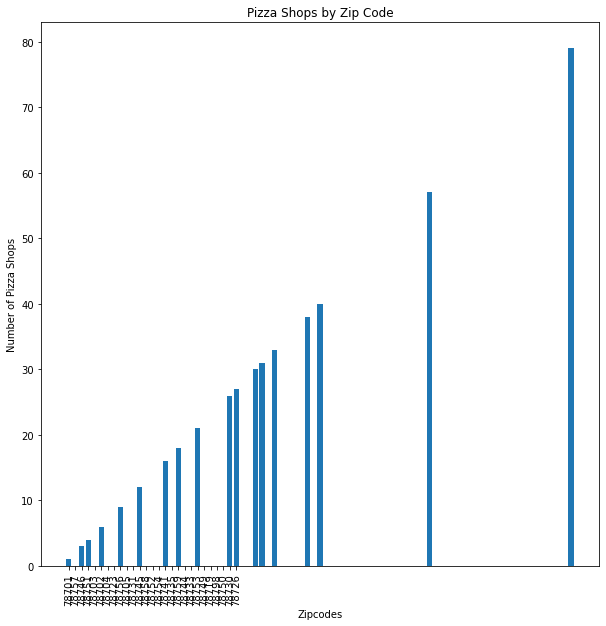

In [564]:

x = mi['biz_zipcode'].value_counts()
y = mi['biz_zipcode'].value_counts()

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x,y)

ax.set_title('Pizza Shops by Zip Code')
ax.set_xlabel('Zipcodes')
ax.set_ylabel('Number of Pizza Shops')
ax.set_xticks(range(1,28))
ax.set_xticklabels(zip_lst_string, rotation=90);


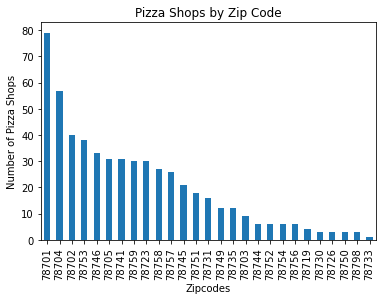

In [604]:
ax= mi['biz_zipcode'].value_counts().plot.bar(x='biz_zipcode')



ax.set_title('Pizza Shops by Zip Code')
ax.set_xlabel('Zipcodes')
ax.set_ylabel('Number of Pizza Shops');




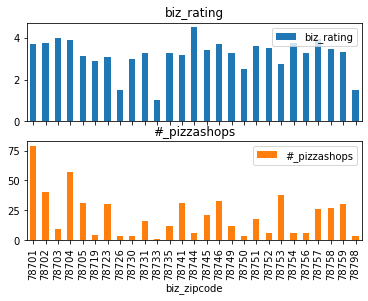

In [609]:
axes = biz_zipcodes.plot.bar(rot=90, subplots=True)

_____________________

In [601]:
# Sorts the number of pizzashops by zipcode and avgerage rating
biz_zipcodes= pd.DataFrame(mi.groupby('biz_zipcode')['biz_rating'].mean())
biz_zipcodes['#_pizzashops']= mi['biz_zipcode'].value_counts()
biz_zipcodes.sort_values(by=['#_pizzashops'])

,biz_rating,#_pizzashops
biz_zipcode,,
78733,1.000000,1
78798,1.500000,3
78750,2.500000,3
78726,1.500000,3
78730,3.000000,3
78719,2.875000,4
78756,3.250000,6
78754,3.750000,6
78752,3.500000,6


In [642]:
piz_zip= pd.DataFrame(mi.groupby('biz_zipcode')['biz_name'].unique())
piz_zip

,biz_name
biz_zipcode,
78701,"[Bull And Bowl, The Grove Wine Bar & Kitchen, The Jackalope, Via 313 Pizza - West 6th, i Fratelli Pizza Downtown Austin, DeSano Pizzeria Napoletana, Numero28, Taverna, The Backspace, Via 313 Pizza - Rainey Street, Roppolo's Pizzeria, Hoboken Pie, Stony's Pizza, The Onion, Quattro Gatti Ristorante e Pizzeria, Craft Pride, Brooklyn Pie Co, Newk's Eatery, Trifecta On 3rd, Salvation Pizza - Rainey Street, Hardwood Pizza, Roppolo's Pizzeria on Wheels, Rosalie Roppolo's Pizzeria, Stony's Pizza-Red River, Famous Beer Crust Pizza, Domenick's Pizzeria, Papa John's Pizza]"
78702,"[Bufalina, Il Brutto, Dough Boys, Pizza On Point, Via 313 Pizza - East Side, East Side Pies, Bennu Coffee, Spartan Pizza, Southside Flying Pizza, Paffuto Pizza, 512 Pizza & Subs, Little Caesars Pizza, Domino's Pizza, Pizza Hut]"
78703,"[Cucina on 35th, Cipollina, 40 North]"
78704,"[Cidercade Austin, Home Slice Pizza, Austin Beer Garden Brewing Company, Enoteca Vespaio, Phantasma Kitchen, The Park on South Lamar, Pinthouse Pizza, Cannone Cucina Italiana, Tilford's Wood Fired Pizza, Brooklyn Pizzeria & Bar, The Meteor, Toss Pizzeria & Pub, More Home Slice Pizza, Giovanni's Pizza Stand, Southside Flying Pizza, Austin's Pizza South Lamar, Pizza Hut, Domino's Pizza]"
78705,"[Via 313 Pizza - North Campus, Moody's Kitchen And Bar, The Pizza Press, Longhorn Pizza & Grill, Roppolo’s Pizzeria West Campus, Jesta Pizza, Niki's Pizza, Domino's Pizza, Littlefield Patio Cafe, Austin's Pizza North Guad]"
78719,"[East Side Pies, Salvation Pizza]"
78723,"[Little Deli & Pizzeria, Oddwood Ales, MOD Pizza, Pieology Pizzeria, Cicis, Pizza Patrón, Little Caesars Pizza, Domino's Pizza, Mr Gatti's Pizza, Pizza Hut]"
78726,[Pizza Hut]
78730,[Austin's Pizza Four Points]


In [671]:
biz_names_list= merged_inner['biz_name'].tolist()


In [651]:
mi['biz_name'].map(contains).value_counts(normalize=True)

False    0.923775
True     0.076225
Name: biz_name, dtype: float64

[array(['Bull And Bowl', 'The Grove Wine Bar & Kitchen', 'The Jackalope',
        'Via 313 Pizza - West 6th', 'i Fratelli Pizza Downtown Austin',
        'DeSano Pizzeria Napoletana', 'Numero28', 'Taverna',
        'The Backspace', 'Via 313 Pizza - Rainey Street',
        "Roppolo's Pizzeria", 'Hoboken Pie', "Stony's Pizza", 'The Onion',
        'Quattro Gatti Ristorante e Pizzeria', 'Craft Pride',
        'Brooklyn Pie Co', "Newk's Eatery", 'Trifecta On 3rd',
        'Salvation Pizza - Rainey Street', 'Hardwood Pizza',
        "Roppolo's Pizzeria on Wheels", "Rosalie Roppolo's Pizzeria",
        "Stony's Pizza-Red River", 'Famous Beer Crust Pizza',
        "Domenick's Pizzeria", "Papa John's Pizza"], dtype=object),
 array(['Bufalina', 'Il Brutto', 'Dough Boys', 'Pizza On Point',
        'Via 313 Pizza - East Side', 'East Side Pies', 'Bennu Coffee',
        'Spartan Pizza', 'Southside Flying Pizza', 'Paffuto Pizza',
        '512 Pizza & Subs', 'Little Caesars Pizza', "Domino's Pizza",


In [662]:
mi[mi['biz_rating']=="Domino's"]


,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode,review_id,text,rating,most_reviewed,Chains,Chain


In [666]:
merged_inner['Chains']= merged_inner['biz_name'].map(is_chain)

In [667]:
merged_inner

,business_id,biz_name,biz_rating,biz_review_count,biz_zipcode,review_id,text,rating,most_reviewed,Chains
0,-kr42hgTb3_SlQqW5xxywQ,Bull And Bowl,5.0,1,78701,4Mmif4lVNNBBrO-QV_1BpQ,"This is the fun bar that W6th has been missing! Duck bowling, pool & a mechanical bull!! Loads of tv's to catch the game and the food is amazing! Perfect...",5,NaN,False
1,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,Y8IQlDycy4txkNxUdn21fA,If I could come here everyday and eat great food and drink good wine I would. A definite must to try in Austin!,5,NaN,False
2,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,FIWbYDMp0MncA9yHOKYDzQ,"Great patio vibes (well heated, nice views)! We also looove their bruschetta :) the salmon entree and capellini pasta were just ok to me, not as great as...",4,NaN,False
3,vo1MjyIvHbAJ93PasKHIRg,The Grove Wine Bar & Kitchen,4.0,288,78701,P1j_StdFQu04ZYoGZLG0kA,"This is a great place to go if you are looking for some great appetizers and wine! We sat out on the patio on a cold night, but we were very warm and...",4,NaN,False
4,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,_D2DYKjdiaRC-2YWyJT96Q,The pizza was great. Staff was very friendly and helpful but the reason I decided to write this review is their COVID-19 protocols. \n\nSeveral restaurants...,5,NaN,False
5,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,87m-ZjH0cz1nDYaLdr6h3w,"Ordered takeout at 6pm on a Saturday night, quick pizza for a dinner rush. Great location (though the sign above the entrance needs illumination), lots of...",5,NaN,False
6,ac1jxd_s57WrIv0NS_TmTA,Shortie’s Pizza & Grinders,4.5,16,78757,u14CWWL17ZNNp8LDUy3W_A,Tried the Shortie's pizza and roasted fennel salad. Whole wheat crust was something new that I hadn't tried anywhere else. I liked it quite a lot! I just...,5,NaN,False
7,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,paqBZHHAviJIgkcu2CxGxA,The food selection is amazing. The choices of wine are on point. The service is amazing. The staff is on point with placing your order and getting it to...,5,NaN,False
8,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,n2EnKMHVcZXikdq_0rAi3g,"Good pizza spot! FINALLY tried this place after moving nearby almost two years ago, and we really enjoyed the takeout- looking forward to dining in on the...",4,NaN,False
9,v87I5i4XxiCr9Ihiqkbc4A,The Grove Wine Bar & Kitchen,4.0,499,78746,eeyoBJZ30bZvCwqumEMIGA,I ate at the Grove before the pandemic as well as during city lockdown. I'm impressed with how much attention to detail they have to food intolerances! I...,5,NaN,False
